## Pneumonia detection
Pneumonia which is a dangerous disease that may occur in one or both lungs usually caused by viruses, fungi or bacteria. We will detect this lung disease based on the x-rays we have. Chest X-rays dataset is taken from Kaggle which contain various x-rays images differentiated by two categories “Pneumonia” and “Normal”. We will be creating a deep learning model which will actually tell us whether the person is having pneumonia disease or not having pneumonia.

#### Tools and Technologies:
VGG16: It is an easy and broadly used Convolutional Neural Network (CNN) Architecture used for ImageNet which is a huge visible database mission utilized in visual object recognition software research.

Transfer learning (TL): It is a technique in deep learning that focuses on taking a pre-trained neural network and storing knowledge gained while solving one problem and applying it to new different datasets. In this article, knowledge gained while learning to recognize 1000 different classes in ImageNet could apply when trying to recognize the disease.

### Downloading dataset of penumonia and normal images from kaggle

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

# print("Path to dataset files:", path)

Resuming download from 8388608 bytes (2454976827 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/paultimothymooney/chest-xray-pneumonia?dataset_version_number=2 (8388608/2463365435) bytes left.


100%|██████████| 2.29G/2.29G [47:21<00:00, 864kB/s]    

Extracting files...


Path to dataset files: C:\Users\PREDATOR\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


### Importing modules needed

In [4]:
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from glob import glob

In [2]:
IMAGESHAPE = [224,224,3]
training_data = 'chest_xray/train'
testing_data = 'chest_xray/test'

VGG16 Model importing

In [5]:
# include_top = False signifies that we do not want to classify 1000 categories present in imagenet
# as there is only two categories penumonia and normal
vgg_model = VGG16(input_shape=IMAGESHAPE , weights = 'imagenet', include_top = False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 62s 1us/step


In [6]:
# setting all layers so that it would not be trained
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [29]:
classes = glob('chest_xray/train/*')
print(classes)


['chest_xray/train\\NORMAL', 'chest_xray/train\\PNEUMONIA']


In [25]:
# add last layer with a softmax activation function
flatten_layer  = Flatten()(vgg_model.output)
prediction = Dense(len(classes),activation='softmax')(flatten_layer)

In [26]:
final_model = Model(inputs = vgg_model.input , outputs = prediction)
final_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
# compile the model using adam optimizer and optimization metric as accuracy
final_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

### Import dataset to Keras using ImageDataGenerator

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224,224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [33]:
test_set = train_datagen.flow_from_directory('chest_xray/test',
                                                 target_size = (224,224),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 624 images belonging to 2 classes.


### Model Training

In [ ]:
# fitted_model = final_model.fit(
#     training_set,
#     validation_data = test_set,
#     epochs = 5,
#     steps_per_epoch = len(training_set),
#     validation_steps = len(test_set)
# )

Epoch 1/5


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1304/1304 ━━━━━━━━━━━━━━━━━━━━ 334s 256ms/step - accuracy: 0.8965 - loss: 0.3697 - val_accuracy: 0.9263 - val_loss: 0.4108
Epoch 2/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 861s 661ms/step - accuracy: 0.9423 - loss: 0.2965 - val_accuracy: 0.7516 - val_loss: 2.2288
Epoch 3/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 491s 377ms/step - accuracy: 0.9534 - loss: 0.2255 - val_accuracy: 0.8029 - val_loss: 1.7496
Epoch 4/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 297s 227ms/step - accuracy: 0.9633 - loss: 0.1700 - val_accuracy: 0.7708 - val_loss: 2.8522
Epoch 5/5
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 509s 390ms/step - accuracy: 0.9692 - loss: 0.1784 - val_accuracy: 0.8061 - val_loss: 1.8519


In [35]:
final_model.save('model.h5')

### Load and Use the Trained Model

In [60]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
def use_model_and_predict(input_img):
    model = load_model('model.h5')
    img = image.load_img( input_img,
                target_size = (224,224))
    imagee = image.img_to_array(img)
    imagee = np.expand_dims(imagee, axis = 0)
    img_data = preprocess_input(imagee)

    prediction = model.predict(img_data)
    # Display the image
    plt.imshow(img)
    plt.axis("off") 
    plt.title("Chest X-Ray") 
    plt.show()

    # final prediction
    if prediction[0][0] > prediction[0][1]:
        print('Person is safe')
    else:
        print('Person is affected with Pneumonia')
    print(f'Predictions : {prediction}')


### Final Prediction

In [61]:
# variable to put the image address
# chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
input_img = 'chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


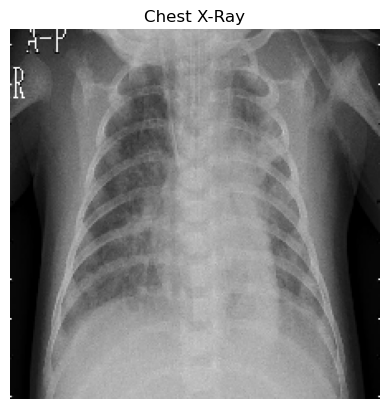

Person is affected with Pneumonia
Predictions : [[0. 1.]]


In [62]:
use_model_and_predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


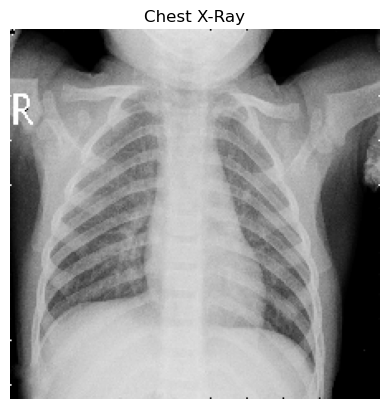

Person is safe
Predictions : [[1. 0.]]


In [64]:
use_model_and_predict('chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg')